In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [15]:
%run -i 'data_pipeline.py'

In [16]:
ratings_df

movie  critic_score  audience_score  \
0                 The Invisible Man            91              88   
1                      The Way Back            83              84   
2     Never Rarely Sometimes Always            99              72   
3                 Bad Boys for Life            77              96   
4                Sonic the Hedgehog            64              93   
...                             ...           ...             ...   
6331          The Adjustment Bureau            71              67   
6332                   Elektra Luxx            24              19   
6333            Battle: Los Angeles            36              48   
6334                      The Eagle            40              41   
6335                     Bloodworth            50              40   

      release_date audience_tomatometer critic_tomatometer  score_difference  
0     Feb 28, 2020                Fresh              Fresh                -3  
1      Mar 6, 2020                Fresh              Fresh                 1  
2     Mar 13, 2020                Fresh              Fresh               -27  
3     Jan 17, 2020                Fresh              Fresh                19  
4     Feb 14, 2020                Fresh              Fresh                29  
...            ...                  ...                ...               ...  
6331   Mar 4, 2011                Fresh              Fresh                -4  
6332  Mar 11, 2011               Rotten             Rotten                -5  
6333  Mar 11, 2011               Rotten             Rotten                12  
6334  Feb 11, 2011               Rotten             Rotten                 1  
6335  May 20, 2011               Rotten             Rotten               -10  

[6336 rows x 7 columns]

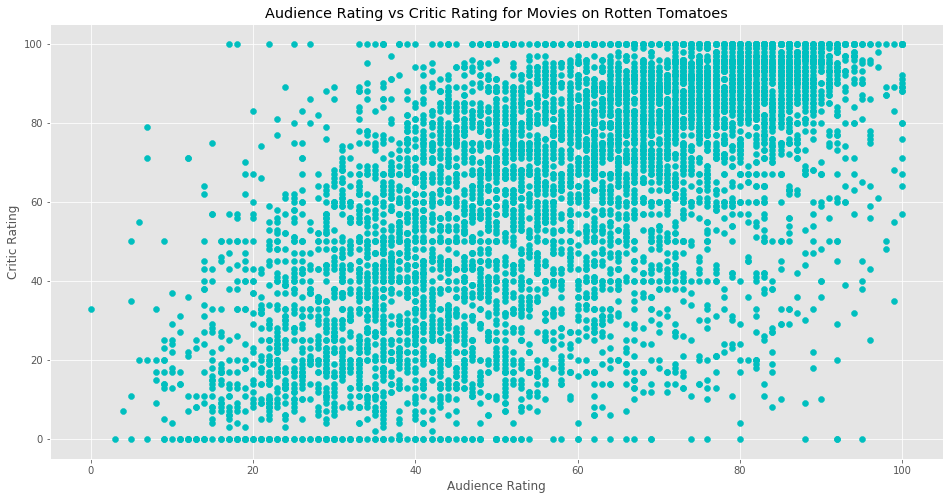

In [60]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

ax.scatter(ratings_df['audience_score'],ratings_df['critic_score'],color='c')
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movies on Rotten Tomatoes')
plt.savefig('audience_vs_critic_rating.png')

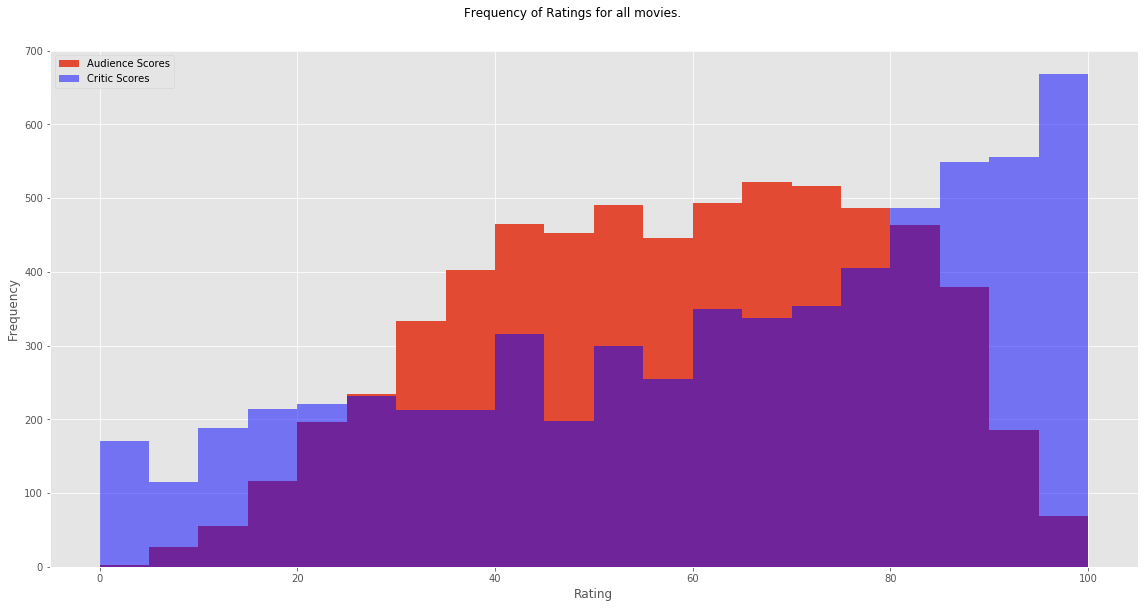

In [61]:
fig, ax = plt.subplots(1,1,figsize=(16,8),sharey=True)

ax.hist(ratings_df['audience_score'],bins=20,label="Audience Scores")
ax.hist(ratings_df['critic_score'],bins=20,label="Critic Scores",color='b', alpha=0.5)

ax.legend()
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')

plt.suptitle('Frequency of Ratings for all movies.',x= 0.5,y=1.05)
plt.tight_layout()
plt.savefig('audience_and_critic_ratings_histogram.png')

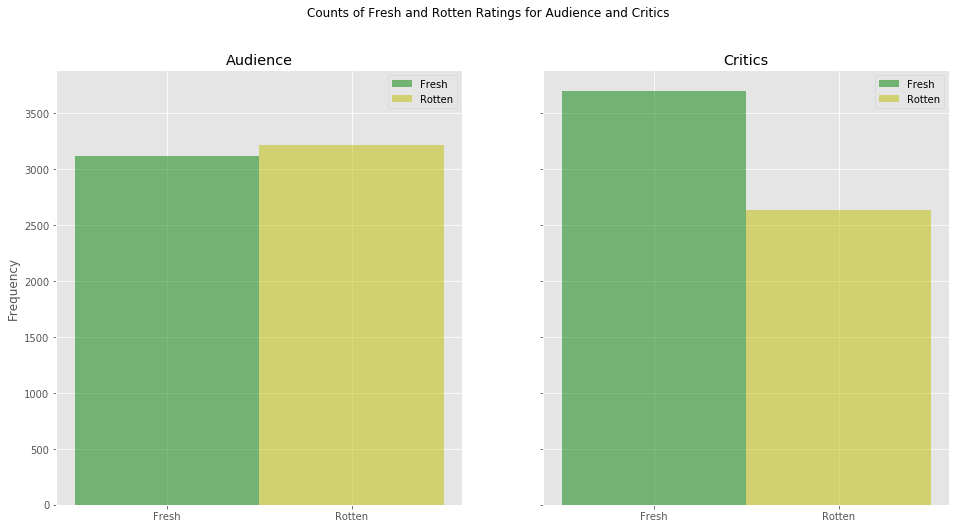

In [72]:
fig, ax = plt.subplots(1,2,figsize=(16,8),sharey=True)

ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Fresh'],bins=1,color='g',label="Fresh",alpha=0.5)
ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Rotten'],bins=1,color='y',label="Rotten",alpha=0.5)
ax[0].legend()
ax[0].set_title('Audience')
ax[0].set_ylabel('Frequency')

ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Fresh'],bins=1,color='g',label="Fresh",alpha=0.5)
ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Rotten'],bins=1,color='y',label="Rotten",alpha=0.5)
ax[1].legend()
ax[1].set_title('Critics')

plt.suptitle('Counts of Fresh and Rotten Ratings for Audience and Critics',x=0.5,y=0.99)
plt.savefig('fresh_vs_rotten.png')

In [20]:
avg_rating = pd.DataFrame()
avg_rating_idx=['Critics','Audience']
avg_rating['Group']=avg_rating_idx
avg_rating['Average_Rating']= ratings_df['critic_score'].aggregate('average'),ratings_df['audience_score'].aggregate('average')
avg_rating

Group  Average_Rating
0   Critics       61.528725
1  Audience       57.722064

In [21]:
diff_count = pd.DataFrame()
groupings=['Critic Score > Audience Score','Critic Score = Audience Score','Critic Score < Audience Score']
diff_count['Group']=groupings
diff_count['Count']= ratings_df['score_difference'][ratings_df['score_difference']<0].count(),ratings_df['score_difference'][ratings_df['score_difference']==0].count(),ratings_df['score_difference'][ratings_df['score_difference']>0].count()
diff_count

Group  Count
0  Critic Score > Audience Score   3875
1  Critic Score = Audience Score    116
2  Critic Score < Audience Score   2345

In [28]:
ratings_df_critic_sorted

movie  critic_score  audience_score  \
1084                  The After Party             0              88   
1430                         Stratton             0              20   
3192                  United Passions             0              11   
1475             The Music of Silence             0              80   
1481               Showdown in Manila             0              22   
...                               ...           ...             ...   
1774                        Heroin(e)           100             100   
1783                  Betting on Zero           100              79   
1804               The Breaking Point           100              84   
1706  Wasted! The Story of Food Waste           100              73   
2425                          Shelley           100              38   

      release_date audience_tomatometer critic_tomatometer  score_difference  
1084  Aug 24, 2018                Fresh             Rotten                88  
1430   Jan 5, 2018               Rotten             Rotten                20  
3192   Jun 5, 2015               Rotten             Rotten                11  
1475   Feb 2, 2018                Fresh             Rotten                80  
1481  Jan 19, 2018               Rotten             Rotten                22  
...            ...                  ...                ...               ...  
1774  Sep 12, 2017                Fresh              Fresh                 0  
1783  Mar 17, 2017                Fresh              Fresh               -21  
1804   Oct 6, 1950                Fresh              Fresh               -16  
1706  Oct 13, 2017                Fresh              Fresh               -27  
2425  Jul 29, 2016               Rotten              Fresh               -62  

[6336 rows x 7 columns]

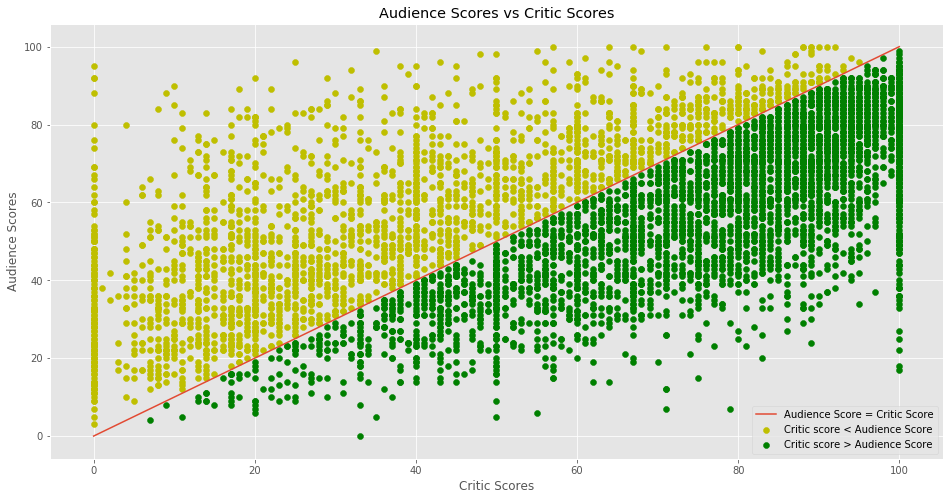

In [65]:
ratings_df_critic_sorted = ratings_df.sort_values(axis=0, by='critic_score')
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax.plot(ratings_df_critic_sorted['critic_score'],ratings_df_critic_sorted['critic_score'],label="Audience Score = Critic Score")
ax.scatter(ratings_df_critic_sorted['critic_score'][ratings_df_critic_sorted['score_difference']>0],ratings_df_critic_sorted['audience_score'][ratings_df_critic_sorted['score_difference']>0],color='y',label='Critic score < Audience Score')
ax.scatter(ratings_df_critic_sorted['critic_score'][ratings_df_critic_sorted['score_difference']<0],ratings_df_critic_sorted['audience_score'][ratings_df_critic_sorted['score_difference']<0],color='g',label='Critic score > Audience Score')
ax.set_xlabel('Critic Scores')
ax.set_ylabel('Audience Scores')
ax.set_title('Audience Scores vs Critic Scores')
ax.legend()
plt.savefig('audience_vs_critic_line.png')

